In [1]:
#DATA EXPLORATION AND PREPROCESSING

In [1]:
#1.import libraries
import pandas as pd
import numpy as np
df=pd.read_csv("adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
#handling the missing values
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)
# Drop rows with missing values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#APPLYING SCALING TECHNIQUES TO NUMERIC FEATURES

In [10]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Scaling is applied to standardize the numerical features before clustering.
#By scaling, we ensure that each feature contributes equally to the formation of clusters.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Standard Scaling
df_standard = df.copy()
df_standard[num_cols] = StandardScaler().fit_transform(df_standard[num_cols])
df_standard[num_cols]
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = minmax_scaler.fit_transform(df[num_cols])
df_minmax_scaled[num_cols]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [17]:
"""Standard Scaling is used when data follows a normal distribution or has outliers; it centers data around mean = 0 and std = 1
to ensure features contribute equally.
Min-Max Scaling is used when features need to be bounded (e.g., \[0, 1]), especially for algorithms like neural networks; 
it maintains the shape of the distribution but scales values uniformly."""


'Standard Scalingis used when data follows a normal distribution or has outliers; it centers data around mean = 0 and std = 1\nto ensure features contribute equally.\nMin-Max Scaling is used when features need to be bounded (e.g., \\[0, 1]), especially for algorithms like neural networks; \nit maintains the shape of the distribution but scales values uniformly.'

In [18]:
#ENCODING TECHNIQUES

In [22]:
# One-Hot Encoding:One-hot encoding converts categorical variables into a binary matrix where each category is represented as a separate column with values 0 or 1.
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [27]:
OHE.fit_transform(df[["sex"]])
OHE_columns = OHE.fit_transform(df[["sex"]]).toarray()
d1=["Female","Male"]
d1

['Female', 'Male']

In [28]:
OHE_columns = pd.DataFrame(OHE_columns)
OHE_columns.columns=d1
OHE_columns

,Female,Male
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
32556,1.0,0.0
32557,0.0,1.0
32558,1.0,0.0
32559,0.0,1.0


In [29]:
df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [34]:
# lable encoding:Label encoding converts categorical values into integer labels (e.g., Red → 0, Green → 1, Blue → 2). 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["marital_status"] = LE.fit_transform(df["marital_status"])
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,Bachelors,13,4,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,83311,Bachelors,13,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,4,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,4,234721,11th,7,2,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,4,338409,Bachelors,13,2,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,4,284582,Masters,14,2,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,4,160187,9th,5,3,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,6,209642,HS-grad,9,2,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,4,45781,Masters,14,4,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,4,159449,Bachelors,13,2,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [35]:
df["marital_status"].value_counts()

2    14976
4    10683
0     4443
5     1025
6      993
3      418
1       23
Name: marital_status, dtype: int64

In [36]:
df_new = pd.concat([df,OHE_columns],axis=1)
df_new

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,39,7,77516,Bachelors,13,4,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0.0,1.0
1,50,6,83311,Bachelors,13,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.0,1.0
2,38,4,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.0,1.0
3,53,4,234721,11th,7,2,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.0,1.0
4,28,4,338409,Bachelors,13,2,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,Assoc-acdm,12,2,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,1.0,0.0
32557,40,4,154374,HS-grad,9,2,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0.0,1.0
32558,58,4,151910,HS-grad,9,6,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,1.0,0.0
32559,22,4,201490,HS-grad,9,4,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0.0,1.0


In [37]:
# dummy coding variables
pd.get_dummies(df["race"])

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
32556,0,0,0,0,1
32557,0,0,0,0,1
32558,0,0,0,0,1
32559,0,0,0,0,1


In [38]:
df = pd.get_dummies(df, drop_first=True)  
df

,age,workclass,fnlwgt,education_num,marital_status,capital_gain,capital_loss,hours_per_week,education_ 11th,education_ 12th,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,7,77516,13,4,2174,0,40,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,6,83311,13,2,0,0,13,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,4,215646,9,0,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,4,234721,7,2,0,0,40,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,4,338409,13,2,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,2,0,0,38,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,4,154374,9,2,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,4,151910,9,6,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,4,201490,9,4,0,0,20,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
Pros of One Hot Encoding
-->Suitable for nominal (unordered) categorical variables.
-->Prevents algorithms from assuming any ordinal relationship.
-->Compatible with most ML models like linear regression, SVM, etc.
Cons of One Hot Encoding
-->Increases dataset dimensionality (especially with many categories).
-->Can lead to sparse matrices, which may slow down training.

Pros of Label Encoding
-->Memory-efficient: doesn't increase number of features.
-->Useful for ordinal data where category order matters.
-->Works well with tree-based algorithms (e.g., Decision Trees, Random Forest).
Cons of Label Encoding
-->Introduces ordinal relationship, even when none exists.
-->Can mislead distance-based models like KNN or linear models.

In [39]:
#FEATURE ENGINEERING

In [40]:
print(df.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status', 'capital_gain', 'capital_loss', 'hours_per_week', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-relative', 'relationship_ Own-child', 'relationship_ Unmarried', 'relationship

In [41]:
df['workclass_salary'] = df['age'] / (df['hours_per_week'] + 1)
df['age_group'] = pd.cut(df['age'],bins=[0, 25, 45, 65, 100],labels=['Young', 'Mid-Age', 'Senior', 'Elder'])
df

,age,workclass,fnlwgt,education_num,marital_status,capital_gain,capital_loss,hours_per_week,education_ 11th,education_ 12th,...,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K,workclass_salary,age_group
0,39,7,77516,13,4,2174,0,40,0,0,...,0,0,0,0,1,0,0,0,0.951220,Mid-Age
1,50,6,83311,13,2,0,0,13,0,0,...,0,0,0,0,1,0,0,0,3.571429,Senior
2,38,4,215646,9,0,0,0,40,0,0,...,0,0,0,0,1,0,0,0,0.926829,Mid-Age
3,53,4,234721,7,2,0,0,40,1,0,...,0,0,0,0,1,0,0,0,1.292683,Senior
4,28,4,338409,13,2,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0.682927,Mid-Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,2,0,0,38,0,0,...,0,0,0,0,1,0,0,0,0.692308,Mid-Age
32557,40,4,154374,9,2,0,0,40,0,0,...,0,0,0,0,1,0,0,1,0.975610,Mid-Age
32558,58,4,151910,9,6,0,0,40,0,0,...,0,0,0,0,1,0,0,0,1.414634,Senior
32559,22,4,201490,9,4,0,0,20,0,0,...,0,0,0,0,1,0,0,0,1.047619,Young


In [42]:
#log transformation
new=df['capital_gain_log'] = df['capital_gain'].apply(lambda x: np.log1p(x))
new

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: capital_gain, Length: 32561, dtype: float64

In [ ]:
Justification for Log Transformation on capital_gain:

* The capital_gain column is highly skewed with many zeros and a few extreme values (outliers).
* Machine learning models (especially linear models) perform better when input features are more normally distributed.
* Applying np.log1p(x):

-->Reduces skewness by compressing large values.
-->Handles zeros safely, since log1p(0) = 0 (avoiding issues with log(0)).
-->Helps models focus more on meaningful variance rather than being dominated by outliers.

#FEATURE SELECTION

In [44]:
#importing isolation forest
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
X = df[num_cols]
df['outlier'] = iso.fit_predict(X)
df = df[df['outlier'] == 1].drop(columns=['outlier'])
"""Impact of Outliers on Model Performance:
-->They skew predictions and reduce accuracy, especially in regression models.
-->Cause inflated errors in metrics like MSE/RMSE.
-->Lead to overfitting, harming generalization to new data.
-->Distort feature importance and make model behavior unstable."""

'Impact of Outliers on Model Performance:\n-->They skew predictions and reduce accuracy, especially in regression models.\n-->Cause inflated errors in metrics like MSE/RMSE.\n-->Lead to overfitting, harming generalization to new data.\n-->Distort feature importance and make model behavior unstable.'

In [ ]:
#PREDICTIVE POWER SCORE(PPS)

In [40]:
#installing ppscore
!pip install ppscore

In [46]:
#import libraries and read data
import ppscore as pps
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
df=pd.read_csv("adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [47]:
pps_matrix=pps.matrix(df)
pps_matrix[pps_matrix['ppscore'] > 0.1].sort_values(by='ppscore', ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
80,marital_status,marital_status,1.000000,predict_itself,True,None,0.000000,1.000000,None
208,native_country,native_country,1.000000,predict_itself,True,None,0.000000,1.000000,None
192,hours_per_week,hours_per_week,1.000000,predict_itself,True,None,0.000000,1.000000,None
176,capital_loss,capital_loss,1.000000,predict_itself,True,None,0.000000,1.000000,None
160,capital_gain,capital_gain,1.000000,predict_itself,True,None,0.000000,1.000000,None
144,sex,sex,1.000000,predict_itself,True,None,0.000000,1.000000,None
128,race,race,1.000000,predict_itself,True,None,0.000000,1.000000,None
112,relationship,relationship,1.000000,predict_itself,True,None,0.000000,1.000000,None
96,occupation,occupation,1.000000,predict_itself,True,None,0.000000,1.000000,None


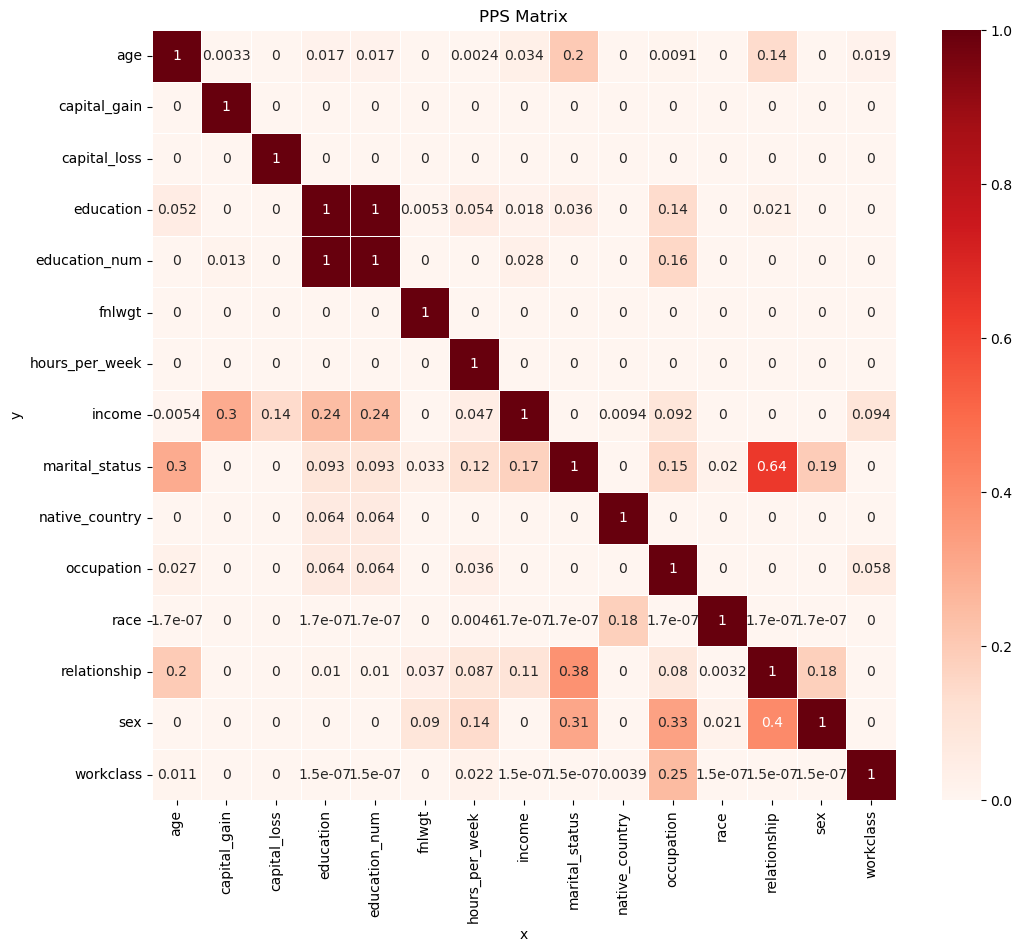

In [49]:
#Visualize PPS Matrix 
import seaborn as sns
import matplotlib.pyplot as plt
matrix = pps.matrix(df).pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, vmin=0, vmax=1, cmap="Reds", linewidths=0.5, annot=True)
plt.title("PPS Matrix")
plt.show()

In [ ]:
 PPS vs Correlation Matrix – Analysis & Comparison:
*Correlation Matrix identifies linear relationships between variables. For example, education_num and education show high
correlation, indicating overlap.
*PPS (Predictive Power Score) goes further by detecting non-linear and asymmetric relationships, showing how well one feature
can predict another.
*In the PPS matrix, features like education_num have high predictive power for income, even if the correlation isn’t the 
strongest.
*Unlike correlation (which is symmetric), PPS is directional, making it more suitable for feature selection in predictive tasks.
